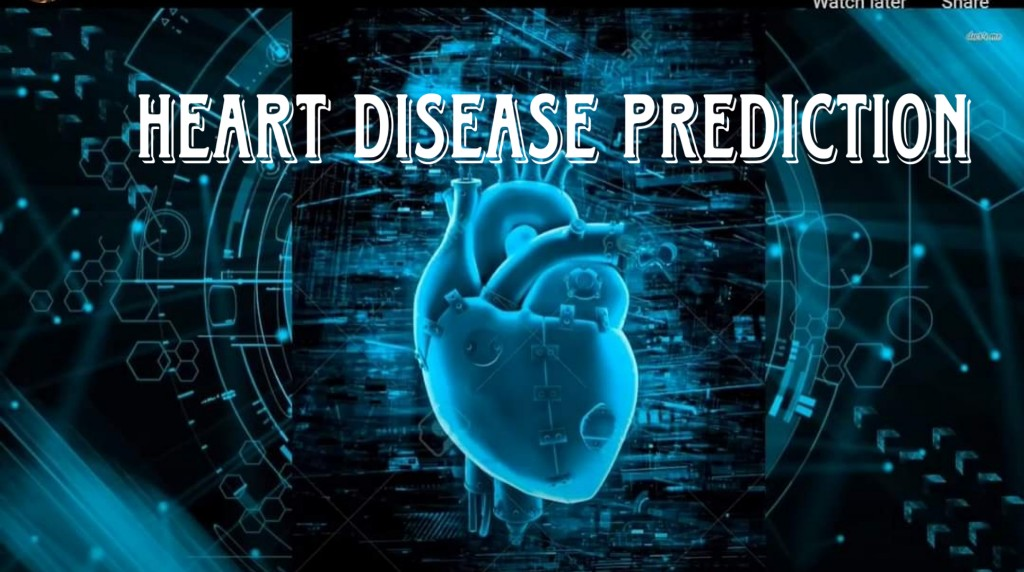

# Predicting heart disease using machine learning
This note-book looks into various python based M.L. and data Sc. libraries to make a machine learning model that is capable of predicting whether a patient has a heart disease or not baseed on his medical attribute

we're going to take the foll approach:
 1. Problem def.
 2. Data
 3. Evaluation
 4. Features
 5. Modelling
 6. Experimentation

## 1. Problem definition
> Given clinical parameters about a patient, can we predict whther or not they've heart disease

## 2. Data
original data taken from UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
> If we can achieve 95% accuracy at predicting whether or not the patient has a heart disease, we'll persue the project

## 4. Features
This is where you'll get the features of your data
**create data dictionary**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Preparing the tools


In [2]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# models from skikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model eval.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [6]:
df = pd.read_csv('heart disease.csv')
df.shape      # (row, col)

(303, 14)

## Data Exploration (or EDA)
The goal here is to find out more about data and become a subject matter export with dataset you're using with

  1. What question(s) are you solving ?
  2. What kind of data do we have and how to treat diff data ?
  3. What's missing from the data and how to deal with it ?
  4. Where are outliers and why to care about them ?
  5. How to add, change, remove features to get more from the data ?

In [7]:
# let's find out how many are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

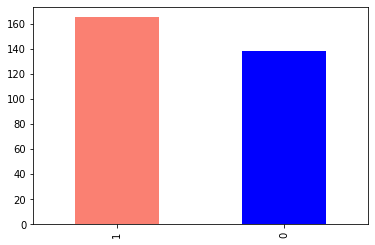

In [12]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'blue']);

In [14]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease according to sex

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
# compare target column with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


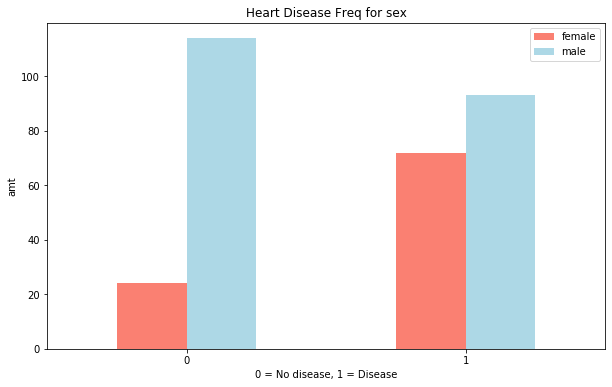

In [40]:
# create a plot for crosstab 
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Heart Disease Freq for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('amt')
plt.legend(['female', 'male'])
plt.xticks(rotation=0);

### Age vs max heart rate for Disease

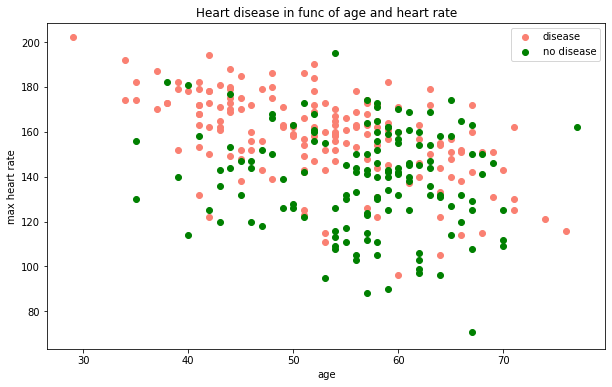

In [33]:
# create another figure
plt.figure(figsize=(10, 6))

# scatter with +ve example
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='salmon')
# scatter with -ve example
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='green')

# add some info
plt.title('Heart disease in func of age and heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease', 'no disease']);

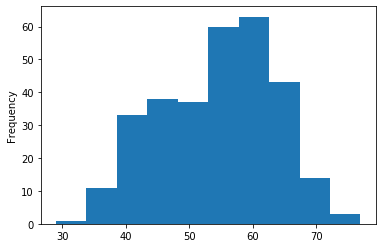

In [36]:
# check distrubution of age col. with hisogram
df.age.plot.hist();

## Heart Disease freq per chest pain type
4 chest pain types :
   * 0 = chest pain due dec in blood supply in heart
   * 1 = chest pain not related to heart
   * 2 = esdophageal spasms
   * 3 = chest pains not showing any signs of disease

In [38]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


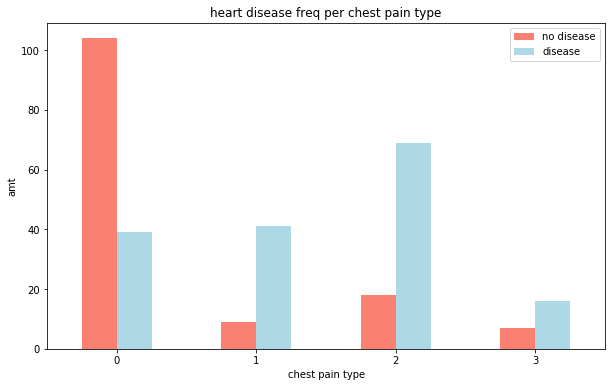

In [41]:
# make crosstab visual
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

# add some info
plt.title('heart disease freq per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amt')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation=0);

In [42]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


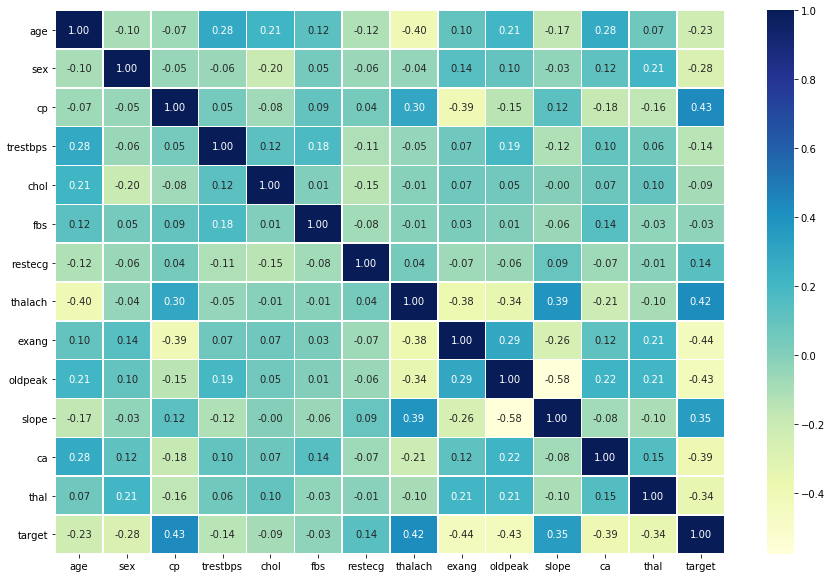

In [44]:
# decorating the correlation
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='YlGnBu');

## Modelling

In [45]:
# split into x & y
x = df.drop('target', axis=1)
y = df['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [48]:
y_train

126    1
291    0
172    0
86     1
159    1
      ..
72     1
235    0
164    1
15     1
205    0
Name: target, Length: 242, dtype: int64

We've split data into training and test set, now we've to build a M.L model.

We'll train it (find patterns) on training set

And we'll test (use patterns) on test set

We're going to try 3 diff type:
  1. logisticsRegressor
  2. k-nearest neighbors classifier
  3. RandomForestClassifier

In [49]:
# make a dictionary of models
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random forest': RandomForestClassifier()}

# create a func to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    models: a dictionary of diff skikit-learn M.L models
    x_train: training data (no labels)
    x_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    
    # make dictionary to keep model score
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit model in data
        model.fit(x_train, y_train)
        
        # eval. model and append to it's score in model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

C:\Pranav\ML_data_Sc\A-heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5573770491803278,
 'Random forest': 0.819672131147541}

### Model comparision

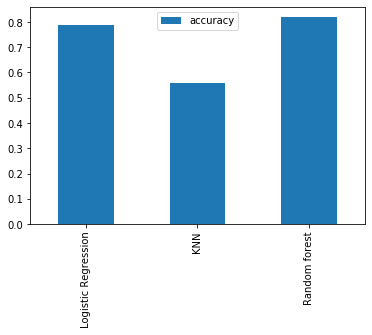

In [54]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

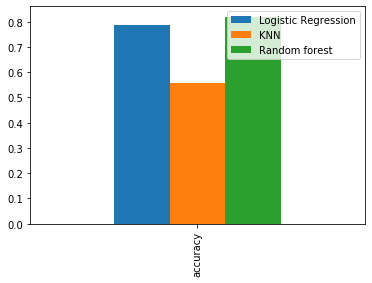

In [56]:
model_compare.plot.bar();

Now we've got our baseline model... and baseline model is not the final model.  What should you do to improve ?

How to go about :
  * Hyperparameter tuning
  * Features importance
  * Confusion matrix
  * cross-validation
  * recall
  * f1 score
  * classification report
  * ROC curve
  * Area under curve (AUC)

### Hyperparameter tuning

In [57]:
# let's tune knn

train_scores = []
test_scores = []

# create a list of diff values for kneighbor
neighbors = range(1, 21)

# set up knn instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    
    test_scores.append(knn.score(x_test, y_test))

In [58]:
train_scores

[1.0,
 0.8099173553719008,
 0.7603305785123967,
 0.78099173553719,
 0.756198347107438,
 0.768595041322314,
 0.7355371900826446,
 0.7231404958677686,
 0.7024793388429752,
 0.7148760330578512,
 0.7107438016528925,
 0.7148760330578512,
 0.6900826446280992,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6818181818181818,
 0.6776859504132231,
 0.6942148760330579,
 0.6942148760330579]

In [59]:
test_scores

[0.5409836065573771,
 0.5573770491803278,
 0.6229508196721312,
 0.6065573770491803,
 0.5573770491803278,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.5245901639344263,
 0.5901639344262295,
 0.5245901639344263,
 0.6065573770491803,
 0.5573770491803278,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082]

Max score on test data for KNN is 63.93%


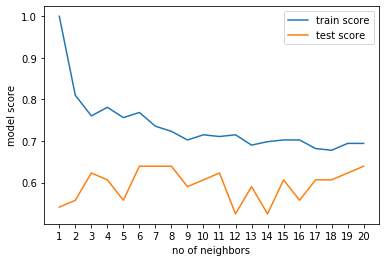

In [67]:
plt.plot(neighbors, train_scores, label='train score')
plt.plot(neighbors, test_scores, label='test score')
plt.xlabel('no of neighbors')
plt.ylabel('model score')

plt.xticks(np.arange(1, 21, 1))
plt.legend()
print(f'Max score on test data for KNN is {max(test_scores) * 100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV
we're tuning :
 * R.F.C
 * Logistic regression

In [73]:
# create a hyperparameter grid for logisticregression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# create a hyperparameter grid for RFC
rfc_grid = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 10),
            'min_samples_leaf': np.arange(1, 20, 2)}

In [71]:
# tune logistic regression

np.random.seed(42)
rs_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_logreg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [72]:
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [74]:
rs_logreg.score(x_test, y_test)

0.7704918032786885

In [75]:
# create hyperparameter tuning for RFC
np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_grid, cv=5, n_iter=20, verbose=True)
rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [76]:
rs_rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [77]:
rs_rfc.score(x_test, y_test)

0.819672131147541

In [78]:
model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5573770491803278,
 'Random forest': 0.819672131147541}

### Hyperparameter tuning with Gridsearch

In [79]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# set up grid hyperparameter search for logisticregression
gr_logreg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gr_logreg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [80]:
gr_logreg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
gr_logreg.score(x_test, y_test)

0.7868852459016393

### Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC
* Confusion matrix
* Classification score
* Precision
* F1
* Recall

.... and it would be great to use cross-validation

To make comparisions & eval our trained model, we need predictions

In [82]:
# make predictions with tuned model
y_preds = gr_logreg.predict(x_test)

In [83]:
y_preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

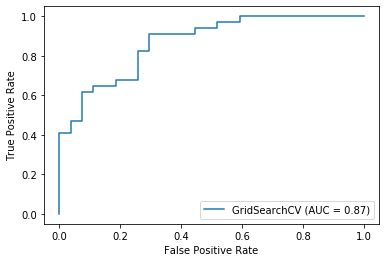

In [84]:
# plot roc curve and cal. AUC metrics
plot_roc_curve(gr_logreg, x_test, y_test);

In [85]:
confusion_matrix(y_test, y_preds)

array([[19,  8],
       [ 5, 29]], dtype=int64)

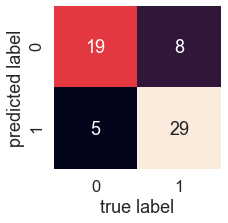

In [92]:
sns.set(font_scale=1.5)

def plot_con_matrix(y_test, y_preds):
    """
    PLots a nice confusion matrix using heatmaps.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

plot_con_matrix(y_test, y_preds)

Text(25.5, 0.5, 'predicted label')

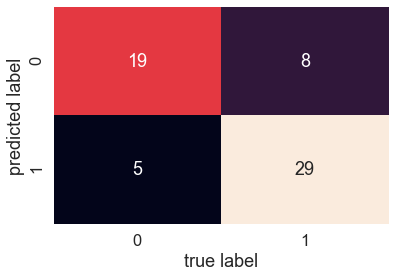

In [93]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel('true label')
ddplt.ylabel('predicted label')

Now we've ROC curve, AUC and con. matrix...... Let's get class. report, cross-validated precision, f1 score, recall 

In [95]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### Calculate eval. metrics with cross validation
we're going to cal precision, f1, recall of our model using cross validation

In [96]:
# check best hyperparameter
gr_logreg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [97]:
# create a new classifier with best hyperparamter
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [99]:
# cross validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [111]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [101]:
# cross validated precision
cv_pre = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [110]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [103]:
# cross validated recall
cv_rec = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [112]:
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [105]:
# cross validated accuracy
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [113]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

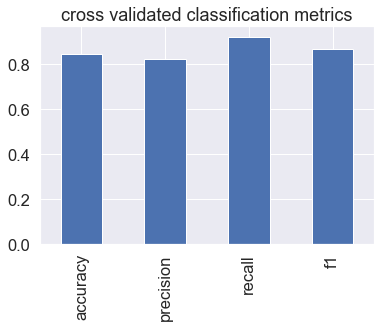

In [115]:
# visualize cross validated metrics
cv_metrics = pd.DataFrame({'accuracy': cv_acc, 'precision': cv_pre, 'recall': cv_rec, 'f1': cv_f1}, index=[0])
cv_metrics.T.plot.bar(title='cross validated classification metrics', legend=False);

## Feature Importance
Feature imp. is like - 'which feature contributed most to the outcomes of the model and how did they contribute ?'

Finding feature imp. is diff for each M.L model. One way of finding feature imp is to search for '(MODEL NAME) feature importance

Finding feature imp for Logisticregression model

In [117]:
# fit an instance of best LogReg
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train, y_train);

In [118]:
# check coef
clf.coef_   # gives how much a col contributes in prediction

array([[-0.00125481, -0.85158966,  0.73562108, -0.01259193, -0.00344392,
         0.30109119,  0.25687478,  0.0294726 , -0.51701604, -0.43247167,
         0.54749706, -0.69870272, -0.76110485]])

In [121]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0012548125770020376,
 'sex': -0.8515896629281131,
 'cp': 0.7356210763423442,
 'trestbps': -0.012591927274735275,
 'chol': -0.0034439191335509513,
 'fbs': 0.30109119490302916,
 'restecg': 0.2568747783115188,
 'thalach': 0.029472596620954684,
 'exang': -0.5170160383518572,
 'oldpeak': -0.4324716663728137,
 'slope': 0.547497061462155,
 'ca': -0.6987027173437832,
 'thal': -0.7611048540365973}

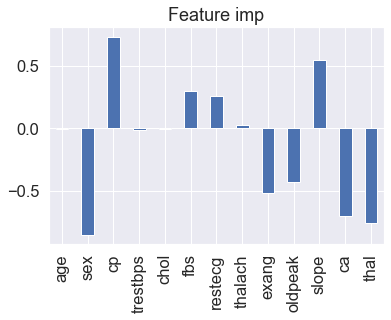

In [123]:
# visualize feature imp
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature imp', legend=False);

### explanation e.g. of diag

In [124]:
# as the sex goes from 1 to 0 (dec), there's a higher possiblity of trgt=1. Inversely proportional hence -ve
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [125]:
# as the slope goes from 0 to 2 (inc), there's a higher possiblity of trgt=1. Directly proportional hence +ve
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
